# Preliminaries

In [1]:
import os
#os.environ["PATH"]="/opt/conda/envs/python2/bin:"+os.environ["PATH"]

Check the version of Python being used. 

In [2]:
!python --version

Python 2.7.12


Specify the parent directory where you want to store the Cactus directory. Once Cactus is built, its contents cannot be easily moved without breaking things. If the Cactus directory is later moved, one has to repeat the following steps to rebuild it from its new location.

In [3]:
etk_dir = '/home/ejwest/ETK'

Change the working directory to the parent directory specified above.

In [4]:
%cd $etk_dir

/home/ejwest/ETK


![cactus](http://cactuscode.org/global/images/cactuslogo.png)

# Compiling Cactus!

Step 1 is to download the code. Cactus uses a script named "GetComponents" to find and prepare all the source code modules that it needs for a given installation. The GetComponents script can be downloaded with a simple invocation of curl. To download GetComponents, uncomment and execute the following lines.

In [8]:
#%cd $etk_dir
#!curl -kLO https://raw.githubusercontent.com/gridaphobe/CRL/ET_2018_02/GetComponents

Step 2 is to download your thornlist. In this tutorial, we are going to use the Einstein Toolkit, a collection of thorns designed to solve the Einstein equations numerically. To download the Einstein Toolkit thornlist, uncomment and execute the following lines.

In [9]:
#%cd $etk_dir
#!curl -kLO https://bitbucket.org/einsteintoolkit/manifest/raw/ET_2018_02/einsteintoolkit.th

You can view a file in the notebook by using the "magic" command "%pycat filename". However, %pycat tries to highlight syntax as if the file is written in python. In those cases you can simply use "%cat filename." Unfortunately, unlike %pycat, %cat leaves the contents of the file on the screen.

To view the downloaded thornlist using %pycat, uncomment and execute the following lines. Note that at the top of the file is a line that reads "DEFINE_ROOT = Cactus". This means that Cactus, and all its thorns, will be checked out under that directory.

In [10]:
%cd $etk_dir
%pycat einsteintoolkit.th

/home/ejwest/ETK


Step 3 is to checkout the components listed in the thornlist. You do this with the GetComponents command.
However before you can execute it, you need to turn on its execute bit. That is what the "chmod" line below does. To run GetComponents, uncomment and execute the following lines.

In [11]:
#%cd $etk_dir
#!chmod a+x GetComponents
#!echo no|./GetComponents --update einsteintoolkit.th

In what follows, it will be useful to have a shortcut variable for the Cactus directory. All simulations are launched from this directory. To create a shortcut variable, edit and execute the following line.

In [12]:
cactus_dir = '/home/ejwest/ETK/Cactus'

Move to the Cactus directory.

In [13]:
%cd $cactus_dir

/home/ejwest/ETK/Cactus


<img src="http://simfactory.org/global/images/factory.png" width="200px">

# Simfactory
Cactus is normally built with a tool called Simfactory. Simfactory, in turn, will call make.
Before it can work, however, it needs to be configured. To configure Simfactory, edit and execute the following lines. Replace the email address in the command below with yours. The email address isn't sent anywhere, all it's used for is allowing Cactus to send job change state notifications to you.

In [14]:
#%cd $cactus_dir
#!./simfactory/bin/sim setup-silent --setup-email=ewest@d.umn.edu 

The above setup command has created a user configuration file. This file contains contains defaults that are used any time you run simfactory. In addition, a machine-specific configuration file has been created in teh machine database (mdb). This file is located in "simfactory/mdb/machines". Your machine name can be identified using the following.

In [15]:
!hostname

lagrange


Next create a shortcut variable for the mdb file. Change the name of the .ini file in the path below to your machine name, returned by the hostname command above.

In [16]:
mdb_file = './simfactory/mdb/machines/lagrange.ini'
!echo $mdb_file

./simfactory/mdb/machines/lagrange.ini


One of the things you may want to change in your mdb file is the directory where simulation output data are dumped. By default, a folder named "simulations" is created in your home directory for this purpose. If you want output data to be printed elsewhere, change the "basedir" entry in the mdb file. You may also want to change "ppn", "max-num-threads", and "num-threads" to the number of physical cores on your machine. If your machine supports hyperthreading, add a line "num-smt = 2".

To view the mdb file using %pycat, uncomment and execute the following lines.

In [17]:
#%cd $cactus_dir
#%pycat $mdb_file

To load the mdb file for your machine, uncomment and execute the following line.

In [18]:
#%load $mdb_file

IF you loaded your mdb file in the previous step, and IF you wish to modify it, then cut and paste the file contents above into the following cell, uncommenting the magic command "%%writefile $mdb_file" at the top. This allows you to edit the mdb file directly from the notebook interface. When your edits are finished, execute the cell. WARNING: this will overwrite your machine's mdb file. This step is optional. If you don't want to mess around with your mdb file at this stage, move to the next step. (NOTE: If you mess things up at any stage, you can always go back to the top of this section and restart the setup process. You do NOT need to recompile Cactus, in the previous section.)

In [19]:
#%%writefile $mdb_file

At long last, you are ready to actually build Cactus. Cactus can often figure out what compilers and build
options to use automatically, but in some cases it is necessary to specify it by hand. The file containing this information is called the OptionList. You can specify an OptionList by hand using the --optionlist=filename.cfg option in the command below. OptionList examples are found in Cactus/simfactory/mdb/optionlists. A good template to start with on a workstation is generic.cfg. Here we will assume that Cactus is smart enough to figure things out on its own, without any OptionList intervention.

To start from a clean slate and remove any previous configurations, uncomment and execute the following lines.

In [21]:
#%cd $cactus_dir
#!rm -rf configs

Finally, below is the command to build Cactus using our thornlist. As written, it will build in parallel using two processes. That's what the -j option does. If all goes well, this step takes a while. Go get a coffee and come back in 30 minutes or so! To proceed to build Cactus, uncomment and execute the following lines.

In [22]:
#%cd $cactus_dir
#!time ./simfactory/bin/sim build -j2 --thornlist=thornlists/einsteintoolkit.th 

The build command creates a configuration called "sim". It is found in the "configs/sim" directory. Let's move to this directory and list its contents.

In [23]:
%cd $cactus_dir/configs/sim
%ls

/home/ejwest/ETK/Cactus/configs/sim
BUILD-ID    SubmitScript  config-data/    lib/
CONFIG-ID   ThornList     config-info     piraha/
OptionList  bindings/     configjar.git/  properties.ini
RunScript   build/        datestamp.o     scratch/


Notice that one of the files in this directory is the ThornList. It contains the list of thorns Cactus will compile. If you wish to add or remove a thorn from your configuration, you can do it by editing this file. 
However, by doing so you risk confusing yourself by forgetting what you've done. Proceed at your own risk! To view the current ThornList using %pycat, uncomment and execute the following line.

In [41]:
#%pycat ThornList

The OptionList file contains all the configuration options. To view the current OptionList using %pycat, uncomment and execute the folowing lines. 

In [26]:
#%pycat OptionList

Unlike the ThornList file, changing the OptionList file here will have no effect. If you wish to change your configuration options without starting over from scratch (i.e., without re-building simfactory), you should edit the file "configs/sim/config-data/make.config.defn." To view this file using %pycat, uncomment and execute the following line.

In [24]:
#%pycat config-data/make.config.defn

# Running Cactus!

Finally, let's run a simulation. First move to the Cactus directory.

In [27]:
%cd $cactus_dir

/home/ejwest/ETK/Cactus


Below we are going to run a simulation that solves the Tolman-Oppenheimer-Volkoff (TOV) equations for a static neutron star. Below is the parameter file for this simulation. Executing the following cell will save any changes to the parfile. (If you don't want to edit the parfile, you can either skip to the next step, or comment out the "%%writefile" line below.)

In [28]:
%%writefile par/static_tov_small.par
## mclachlan tov_static
ActiveThorns = "Time MoL"
ActiveThorns = "Coordbase CartGrid3d Boundary StaticConformal"
ActiveThorns = "SymBase ADMBase TmunuBase HydroBase InitBase ADMCoupling ADMMacros"
ActiveThorns = "IOUtil Formaline"
ActiveThorns = "SpaceMask CoordGauge Constants LocalReduce aeilocalinterp LoopControl"
ActiveThorns = "Carpet CarpetLib CarpetReduce CarpetRegrid2 CarpetInterp"
ActiveThorns = "CarpetIOASCII CarpetIOScalar CarpetIOHDF5 CarpetIOBasic"

ActiveThorns = "ML_ADMConstraints NaNChecker"

# grid parameters
CartGrid3D::type         = "coordbase"
CartGrid3D::domain       = "full"
CartGrid3D::avoid_origin = "no"
CoordBase::xmin =   0.0
CoordBase::ymin =   0.0
CoordBase::zmin =   0.0
CoordBase::xmax = 240.0
CoordBase::ymax = 240.0
CoordBase::zmax = 240.0
CoordBase::dx   =   12
CoordBase::dy   =   12
CoordBase::dz   =   12

CoordBase::boundary_size_x_lower        = 3
CoordBase::boundary_size_y_lower        = 3
CoordBase::boundary_size_z_lower        = 3
CoordBase::boundary_size_x_upper        = 3
CoordBase::boundary_size_y_upper        = 3
CoordBase::boundary_size_z_upper        = 3
CoordBase::boundary_shiftout_x_lower    = 1
CoordBase::boundary_shiftout_y_lower    = 1
CoordBase::boundary_shiftout_z_lower    = 1
CoordBase::boundary_shiftout_x_upper    = 0
CoordBase::boundary_shiftout_y_upper    = 0
CoordBase::boundary_shiftout_z_upper    = 0




ActiveThorns = "ReflectionSymmetry"

ReflectionSymmetry::reflection_x = "yes"
ReflectionSymmetry::reflection_y = "yes"
ReflectionSymmetry::reflection_z = "yes"
ReflectionSymmetry::avoid_origin_x = "no"
ReflectionSymmetry::avoid_origin_y = "no"
ReflectionSymmetry::avoid_origin_z = "no"



TmunuBase::stress_energy_storage = yes
TmunuBase::stress_energy_at_RHS  = yes
TmunuBase::timelevels            =  1
TmunuBase::prolongation_type     = none

HydroBase::timelevels            = 3

ADMMacros::spatial_order = 4

ADMBase::metric_type     = "physical"

ML_ADMConstraints::timelevels = 3

SpaceMask::use_mask      = "yes"

Cactus::terminate           = "time"
Cactus::cctk_final_time     = 1000

Carpet::domain_from_coordbase = "yes"
Carpet::enable_all_storage       = no
Carpet::use_buffer_zones         = "yes"

Carpet::poison_new_timelevels    = "yes"
Carpet::check_for_poison         = "no"
Carpet::poison_value             = 113

Carpet::init_3_timelevels        = no
Carpet::init_fill_timelevels     = "yes"

CarpetLib::poison_new_memory = "yes"
CarpetLib::poison_value      = 114

# system specific Carpet paramters
Carpet::max_refinement_levels    = 10
driver::ghost_size               = 3
Carpet::prolongation_order_space = 3
Carpet::prolongation_order_time  = 2

CarpetRegrid2::regrid_every = 0
CarpetRegrid2::num_centres  = 1

CarpetRegrid2::num_levels_1 = 5
CarpetRegrid2::radius_1[1]  =120.0
CarpetRegrid2::radius_1[2]  = 60.0
CarpetRegrid2::radius_1[3]  = 30.0
CarpetRegrid2::radius_1[4]  = 15.0


time::dtfac = 0.25
MoL::ODE_Method             = "rk4"
MoL::MoL_Intermediate_Steps = 4
MoL::MoL_Num_Scratch_Levels = 1

# check all physical variables for NaNs
NaNChecker::check_every = 1
NaNChecker::action_if_found = "just warn" #"terminate", "just warn", "abort"
NaNChecker::check_vars = "ADMBase::metric ADMBase::lapse ADMBase::shift HydroBase::rho HydroBase::eps HydroBase::press HydroBase::vel"

## Lapse Condition:  \partial_t alpha = - alpha K
## Shift Condition:  \partial_t beta^i = 0

# Hydro paramters
ActiveThorns = "EOS_Omni"
ActiveThorns = "GRHydro"

HydroBase::evolution_method      = "GRHydro"

GRHydro::riemann_solver            = "Marquina"
GRHydro::GRHydro_eos_type           = "Polytype"
GRHydro::GRHydro_eos_table          = "2D_Polytrope"
GRHydro::recon_method              = "ppm"
GRHydro::GRHydro_stencil            = 3
GRHydro::bound                     = "none"
GRHydro::rho_abs_min               = 1.e-10
#GRHydro::GRHydro = 18 # Tmunu(10), rho,press,eps,w_lorentz,vel, tau
#GRHydro::GRHydro    = 10    # gij(6), alpha, beta(3)


ActiveThorns = "GenericFD NewRad"
ActiveThorns = "ML_BSSN ML_BSSN_Helper"
ADMBase::evolution_method        = "ML_BSSN"
ADMBase::lapse_evolution_method  = "ML_BSSN"
ADMBase::shift_evolution_method  = "ML_BSSN"
ADMBase::dtlapse_evolution_method= "ML_BSSN"
ADMBase::dtshift_evolution_method= "ML_BSSN"

ML_BSSN::timelevels = 3

ML_BSSN::harmonicN           = 1      # 1+log
ML_BSSN::harmonicF           = 1.0    # 1+log
ML_BSSN::evolveA             = 1
ML_BSSN::evolveB             = 0
ML_BSSN::ShiftGammaCoeff     = 0.0
ML_BSSN::AlphaDriver         = 0.0
ML_BSSN::BetaDriver          = 0.0
ML_BSSN::advectLapse         = 0
ML_BSSN::advectShift         = 0

ML_BSSN::MinimumLapse        = 1.0e-8

ML_BSSN::initial_boundary_condition = "extrapolate-gammas"
ML_BSSN::rhs_boundary_condition     = "NewRad"

ML_BSSN::ML_log_confac_bound = "none"
ML_BSSN::ML_metric_bound     = "none"
ML_BSSN::ML_Gamma_bound      = "none"
ML_BSSN::ML_trace_curv_bound = "none"
ML_BSSN::ML_curv_bound       = "none"
ML_BSSN::ML_lapse_bound      = "none"
ML_BSSN::ML_dtlapse_bound    = "none"
ML_BSSN::ML_shift_bound      = "none"
ML_BSSN::ML_dtshift_bound    = "none"



# init parameters
InitBase::initial_data_setup_method = "init_some_levels"

ActiveThorns = "TOVSolver"

ADMBase::initial_data            = "tov"
ADMBase::initial_lapse           = "tov"
ADMBase::initial_shift           = "tov"
ADMBase::initial_dtlapse         = "zero"
ADMBase::initial_dtshift         = "zero"

TOVSolver::TOV_Rho_Central[0] = 1.28e-3
TOVSolver::TOV_Gamma          = 2.0
TOVSolver::TOV_K              = 100.0


IOBasic::outInfo_every              = 1
IOBasic::outInfo_vars               = "HydroBase::rho ADMBase::lapse"

IO::out_dir      = $parfile

IOScalar::outScalar_every = 32
IOScalar::one_file_per_group = yes
IOScalar::outScalar_vars  = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"

IOASCII::out1D_every     = 256
IOASCII::one_file_per_group = yes
IOASCII::output_symmetry_points = no
IOASCII::out3D_ghosts           = no
IOASCII::out3D_outer_ghosts     = no
IOASCII::out1D_vars      = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"


Overwriting par/static_tov_small.par


Next create a shortcut variable for the directory where simulation output data is dumped. To do this, edit and execute the following line.

In [29]:
sim_dir = '/home/ejwest/ETK/simulations'

To delete any old versions of the simulation and start over again, uncomment and execute the following line.

In [30]:
#!rm -rf $sim_dir/static_tov_small

At long last, we are ready run Cactus. This configuration specifies running on two threads, with 1 thread per process. To execute this command, Cactus uses a RunScript stored in configs/sim/RunScript. You might want to take a look at it. Identifiers sandwiched between @ symbols get replaced by Simfactory prior to execution. To view the RunScript using %pycat, uncomment and execute the following line.

In [31]:
#%pycat $cactus_dir/configs/sim/RunScript

Enough already! Let's run Cactus! We are creating a new simulation called "static_tov_small", using the above parfile, and the specified number of processes. Set procs equal to the number of logical cores on your machine (number of physical cores times 2 if your CPU allows hyperthreading, otherwise just the number of physical cores). The simulation may take several hours to finish, depending on the speed of your machine. To start running, uncomment and execute the following lines.

In [32]:
%cd $cactus_dir
!./simfactory/bin/sim create-run static_tov_small --parfile=par/static_tov_small.par --procs=4

/home/ejwest/ETK/Cactus
Parameter file: /home/ejwest/ETK/Cactus/par/static_tov_small.par
Skeleton Created
Job directory: "/home/ejwest/ETK/simulations/static_tov_small"
Executable: "/home/ejwest/ETK/Cactus/exe/cactus_sim"
Option list: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/cfg/OptionList"
Submit script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/SubmitScript"
Run script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/RunScript"
Parameter file: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/par/static_tov_small.par"
Simulation name: static_tov_small
Assigned restart id: 0 
Running simulation static_tov_small
Preparing:
+ set -e
+ cd /home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ echo Checking:
Checking:
+ pwd
/home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ hostname
lagrange
+ date
Sat Apr 21 11:33:07 CDT 2018
+ echo Environment:
Environment:
+ export CACTUS_NUM_PROCS=1
+ export CACTUS_

INFO (Carpet): Multi-Model listing:
   model 0: "world"
INFO (Carpet): Multi-Model process distribution:
   process 0: model 0 "world"
INFO (Carpet): Multi-Model: This is process 0, model 0 "world"
INFO (CarpetLib): Process startup time was 1.88 seconds
Current core file size limit: hard=[unlimited], soft=0 MB
Current memory size limit: hard=[unlimited], soft=[unlimited]
INFO (CycleClock): Measuring CycleClock tick via OpenMP...
INFO (CycleClock): Calibrated CycleClock: 0.358005 ns per clock tick (2.79326 GHz)
INFO (Formaline): Configuration id: config-sim-lagrange-home-ejwest-ETK-Cactus
INFO (Formaline): Build id: build-sim-lagrange-ejwest-2018.04.09-18.40.32-8854
INFO (Formaline): Simulation id: run-static_tov_small-lagrange-ejwest-2018.04.21-16.33.09-17097
INFO (Formaline): Run id: run-static_tov_small-lagrange-ejwest-2018.04.21-16.33.09-17097
INFO (Vectors): Using vector size 2 for architecture SSE2 (64-bit precision)
----------------------------------------------------------------

INFO (Carpet): Grid structure (superregions, grid points):
   [0][0][0]   exterior: [0,0,0] : [25,25,25]   ([26,26,26] + PADDING) 17576
   [1][0][0]   exterior: [3,3,3] : [37,37,37]   ([35,35,35] + PADDING) 42875
   [2][0][0]   exterior: [9,9,9] : [43,43,43]   ([35,35,35] + PADDING) 42875
   [3][0][0]   exterior: [21,21,21] : [54,54,54]   ([34,34,34] + PADDING) 39304
   [4][0][0]   exterior: [45,45,45] : [77,77,77]   ([33,33,33] + PADDING) 35937
INFO (Carpet): Grid structure (superregions, coordinates):
   [0][0][0]   exterior: [-36.000000000000000,-36.000000000000000,-36.000000000000000] : [264.000000000000000,264.000000000000000,264.000000000000000] : [12.000000000000000,12.000000000000000,12.000000000000000]
   [1][0][0]   exterior: [-18.000000000000000,-18.000000000000000,-18.000000000000000] : [186.000000000000000,186.000000000000000,186.000000000000000] : [6.000000000000000,6.000000000000000,6.000000000000000]
   [2][0][0]   exterior: [-9.000000000000000,-9.000000000000000,-9.000

     1312     7.688 |    0.6701278    0.9966375 | 9.996707e-11    0.0012622
     1344     7.875 |    0.6701379    0.9966375 | 9.999455e-11    0.0012622
     1376     8.062 |    0.6701488    0.9966375 | 9.996799e-11    0.0012623
     1408     8.250 |    0.6701606    0.9966375 | 9.999928e-11    0.0012623
     1440     8.438 |    0.6701734    0.9966375 | 9.994016e-11    0.0012623
     1472     8.625 |    0.6701870    0.9966375 | 9.999302e-11    0.0012624
     1504     8.812 |    0.6702014    0.9966375 | 9.997715e-11    0.0012624
     1536     9.000 |    0.6702165    0.9966375 | 1.000000e-10    0.0012624
     1568     9.188 |    0.6702321    0.9966375 | 9.997716e-11    0.0012624
     1600     9.375 |    0.6702479    0.9966375 | 9.999492e-11    0.0012624
     1632     9.562 |    0.6702639    0.9966375 | 9.994014e-11    0.0012624
     1664     9.750 |    0.6702799    0.9966375 | 9.999812e-11    0.0012623
     1696     9.938 |    0.6702958    0.9966375 | 9.996668e-11    0.0012623
     1728   

     4256    24.938 |    0.6728322    0.9966376 | 9.981094e-11    0.0012420
     4288    25.125 |    0.6728740    0.9966376 | 9.998463e-11    0.0012418
     4320    25.312 |    0.6729154    0.9966376 | 9.988160e-11    0.0012415
     4352    25.500 |    0.6729565    0.9966376 | 9.999863e-11    0.0012412
     4384    25.688 |    0.6729973    0.9966376 | 9.984541e-11    0.0012409
     4416    25.875 |    0.6730382    0.9966376 | 9.998510e-11    0.0012406
     4448    26.062 |    0.6730795    0.9966376 | 9.994634e-11    0.0012403
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
     4480    26.250 |    0.6731216    0.9966376 | 9.999095e-11    0.0012400
     4512    26.438 |    0.6731648    0.9966376 | 9.981526e-11    0.0012397
     4544   

     7072    41.438 |    0.6773139    0.9966377 | 9.989001e-11    0.0012025
     7104    41.625 |    0.6773628    0.9966377 | 9.996937e-11    0.0012020
     7136    41.812 |    0.6774111    0.9966377 | 9.989126e-11    0.0012015
     7168    42.000 |    0.6774590    0.9966377 | 1.000000e-10    0.0012011
     7200    42.188 |    0.6775067    0.9966377 | 9.990313e-11    0.0012006
     7232    42.375 |    0.6775544    0.9966377 | 9.997427e-11    0.0012001
     7264    42.562 |    0.6776022    0.9966377 | 9.979356e-11    0.0011997
     7296    42.750 |    0.6776500    0.9966377 | 9.998779e-11    0.0011992
     7328    42.938 |    0.6776978    0.9966377 | 9.986344e-11    0.0011988
     7360    43.125 |    0.6777455    0.9966377 | 9.997481e-11    0.0011984
     7392    43.312 |    0.6777930    0.9966377 | 9.978527e-11    0.0011979
     7424    43.500 |    0.6778401    0.9966377 | 9.999465e-11    0.0011975
     7456    43.688 |    0.6778865    0.9966377 | 9.987570e-11    0.0011971
     7488   

    10016    58.688 |    0.6800797    0.9966378 | 9.980953e-11    0.0011834
    10048    58.875 |    0.6800896    0.9966378 | 9.997404e-11    0.0011834
    10080    59.062 |    0.6800998    0.9966378 | 9.981326e-11    0.0011834
    10112    59.250 |    0.6801102    0.9966378 | 9.998578e-11    0.0011834
    10144    59.438 |    0.6801207    0.9966378 | 9.976598e-11    0.0011834
    10176    59.625 |    0.6801314    0.9966378 | 9.996057e-11    0.0011833
    10208    59.812 |    0.6801419    0.9966378 | 9.989030e-11    0.0011833
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    10240    60.000 |    0.6801522    0.9966378 | 1.000000e-10    0.0011833
    10272    60.188 |    0.6801622    0.9966378 | 9.976855e-11    0.0011833
    10304   

    12832    75.188 |    0.6799574    0.9966378 | 9.956178e-11    0.0011875
    12864    75.375 |    0.6799443    0.9966378 | 9.997076e-11    0.0011876
    12896    75.562 |    0.6799314    0.9966378 | 9.984258e-11    0.0011877
    12928    75.750 |    0.6799189    0.9966378 | 9.998305e-11    0.0011878
    12960    75.938 |    0.6799066    0.9966378 | 9.983565e-11    0.0011879
    12992    76.125 |    0.6798944    0.9966378 | 9.992591e-11    0.0011880
    13024    76.312 |    0.6798822    0.9966378 | 9.988191e-11    0.0011881
    13056    76.500 |    0.6798697    0.9966378 | 9.999318e-11    0.0011882
    13088    76.688 |    0.6798568    0.9966378 | 9.984907e-11    0.0011883
    13120    76.875 |    0.6798434    0.9966378 | 9.996181e-11    0.0011884
    13152    77.062 |    0.6798295    0.9966378 | 9.977756e-11    0.0011885
    13184    77.250 |    0.6798151    0.9966378 | 9.995520e-11    0.0011886
    13216    77.438 |    0.6798003    0.9966378 | 9.981347e-11    0.0011887
    13248   

    15776    92.438 |    0.6779717    0.9966377 | 9.947024e-11    0.0012026
    15808    92.625 |    0.6779388    0.9966377 | 9.994572e-11    0.0012028
    15840    92.812 |    0.6779062    0.9966377 | 9.980475e-11    0.0012031
    15872    93.000 |    0.6778743    0.9966377 | 1.000000e-10    0.0012033
    15904    93.188 |    0.6778430    0.9966377 | 9.955802e-11    0.0012036
    15936    93.375 |    0.6778123    0.9966377 | 9.995315e-11    0.0012038
    15968    93.562 |    0.6777821    0.9966377 | 9.978927e-11    0.0012040
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    16000    93.750 |    0.6777521    0.9966377 | 9.998007e-11    0.0012043
    16032    93.938 |    0.6777221    0.9966377 | 9.949950e-11    0.0012045
    16064   

    18592   108.938 |    0.6749170    0.9966377 | 9.977409e-11    0.0012268
    18624   109.125 |    0.6748793    0.9966377 | 9.993546e-11    0.0012271
    18656   109.312 |    0.6748424    0.9966377 | 9.968476e-11    0.0012274
    18688   109.500 |    0.6748064    0.9966376 | 9.999088e-11    0.0012277
    18720   109.688 |    0.6747715    0.9966376 | 9.962925e-11    0.0012280
    18752   109.875 |    0.6747374    0.9966376 | 9.994031e-11    0.0012283
    18784   110.062 |    0.6747038    0.9966376 | 9.965199e-11    0.0012285
    18816   110.250 |    0.6746704    0.9966376 | 9.997798e-11    0.0012288
    18848   110.438 |    0.6746369    0.9966376 | 9.957947e-11    0.0012291
    18880   110.625 |    0.6746028    0.9966376 | 9.992705e-11    0.0012294
    18912   110.812 |    0.6745681    0.9966376 | 9.967098e-11    0.0012297
    18944   111.000 |    0.6745326    0.9966376 | 1.000000e-10    0.0012300
    18976   111.188 |    0.6744965    0.9966376 | 9.954668e-11    0.0012302
    19008   

    21536   126.188 |    0.6721657    0.9966375 | 9.955108e-11    0.0012487
    21568   126.375 |    0.6721459    0.9966375 | 9.990226e-11    0.0012489
    21600   126.562 |    0.6721261    0.9966375 | 9.957363e-11    0.0012490
    21632   126.750 |    0.6721063    0.9966375 | 9.997912e-11    0.0012492
    21664   126.938 |    0.6720865    0.9966375 | 9.967712e-11    0.0012493
    21696   127.125 |    0.6720666    0.9966375 | 9.994565e-11    0.0012495
    21728   127.312 |    0.6720468    0.9966375 | 9.972159e-11    0.0012496
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    21760   127.500 |    0.6720272    0.9966375 | 9.998877e-11    0.0012497
    21792   127.688 |    0.6720081    0.9966375 | 9.938736e-11    0.0012499
    21824   

    24352   142.688 |    0.6715423    0.9966374 | 9.947944e-11    0.0012518
    24384   142.875 |    0.6715474    0.9966374 | 9.991974e-11    0.0012517
    24416   143.062 |    0.6715522    0.9966374 | 9.929448e-11    0.0012516
    24448   143.250 |    0.6715571    0.9966374 | 9.995641e-11    0.0012516
    24480   143.438 |    0.6715621    0.9966374 | 9.946720e-11    0.0012515
    24512   143.625 |    0.6715675    0.9966374 | 9.991894e-11    0.0012514
    24544   143.812 |    0.6715736    0.9966374 | 9.964256e-11    0.0012513
    24576   144.000 |    0.6715805    0.9966374 | 1.000000e-10    0.0012512
    24608   144.188 |    0.6715883    0.9966374 | 9.975361e-11    0.0012512
    24640   144.375 |    0.6715970    0.9966374 | 9.990991e-11    0.0012511
    24672   144.562 |    0.6716066    0.9966374 | 9.964790e-11    0.0012510
    24704   144.750 |    0.6716168    0.9966374 | 9.996211e-11    0.0012509
    24736   144.938 |    0.6716274    0.9966374 | 9.966426e-11    0.0012508
    24768   

    27296   159.938 |    0.6729766    0.9966372 | 9.964170e-11    0.0012385
    27328   160.125 |    0.6730010    0.9966372 | 9.992363e-11    0.0012384
    27360   160.312 |    0.6730259    0.9966372 | 9.962713e-11    0.0012382
    27392   160.500 |    0.6730510    0.9966372 | 9.997448e-11    0.0012380
    27424   160.688 |    0.6730759    0.9966372 | 9.957092e-11    0.0012378
    27456   160.875 |    0.6731006    0.9966372 | 9.985526e-11    0.0012376
    27488   161.062 |    0.6731247    0.9966372 | 9.964323e-11    0.0012374
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    27520   161.250 |    0.6731482    0.9966372 | 9.997611e-11    0.0012372
    27552   161.438 |    0.6731714    0.9966372 | 9.963913e-11    0.0012370
    27584   

    30112   176.438 |    0.6751866    0.9966370 | 9.963447e-11    0.0012208
    30144   176.625 |    0.6752127    0.9966370 | 9.989724e-11    0.0012206
    30176   176.812 |    0.6752387    0.9966370 | 9.935203e-11    0.0012204
    30208   177.000 |    0.6752644    0.9966370 | 1.000000e-10    0.0012203
    30240   177.188 |    0.6752896    0.9966370 | 9.935563e-11    0.0012201
    30272   177.375 |    0.6753143    0.9966370 | 9.992665e-11    0.0012199
    30304   177.562 |    0.6753382    0.9966370 | 9.969816e-11    0.0012197
    30336   177.750 |    0.6753617    0.9966370 | 9.995662e-11    0.0012195
    30368   177.938 |    0.6753848    0.9966370 | 9.938337e-11    0.0012193
    30400   178.125 |    0.6754078    0.9966370 | 9.988310e-11    0.0012191
    30432   178.312 |    0.6754311    0.9966370 | 9.967145e-11    0.0012189
    30464   178.500 |    0.6754549    0.9966370 | 9.998109e-11    0.0012188
    30496   178.688 |    0.6754795    0.9966370 | 9.944754e-11    0.0012186
    30528   

    33056   193.688 |    0.6771214    0.9966368 | 9.956309e-11    0.0012060
    33088   193.875 |    0.6771375    0.9966368 | 9.990604e-11    0.0012059
    33120   194.062 |    0.6771530    0.9966368 | 9.934494e-11    0.0012058
    33152   194.250 |    0.6771680    0.9966368 | 9.994887e-11    0.0012056
    33184   194.438 |    0.6771824    0.9966368 | 9.939946e-11    0.0012055
    33216   194.625 |    0.6771963    0.9966368 | 9.991452e-11    0.0012054
    33248   194.812 |    0.6772097    0.9966368 | 9.967078e-11    0.0012053
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    33280   195.000 |    0.6772228    0.9966368 | 1.000000e-10    0.0012052
    33312   195.188 |    0.6772358    0.9966368 | 9.959054e-11    0.0012051
    33344   

    35872   210.188 |    0.6777581    0.9966365 | 9.960750e-11    0.0012014
    35904   210.375 |    0.6777560    0.9966365 | 9.985837e-11    0.0012015
    35936   210.562 |    0.6777538    0.9966365 | 9.952160e-11    0.0012015
    35968   210.750 |    0.6777515    0.9966365 | 9.993621e-11    0.0012015
    36000   210.938 |    0.6777491    0.9966365 | 9.938780e-11    0.0012015
    36032   211.125 |    0.6777468    0.9966365 | 9.982854e-11    0.0012016
    36064   211.312 |    0.6777445    0.9966365 | 9.949158e-11    0.0012016
    36096   211.500 |    0.6777422    0.9966365 | 9.997613e-11    0.0012016
    36128   211.688 |    0.6777399    0.9966365 | 9.954354e-11    0.0012017
    36160   211.875 |    0.6777375    0.9966365 | 9.984991e-11    0.0012017
    36192   212.062 |    0.6777351    0.9966365 | 9.942364e-11    0.0012017
    36224   212.250 |    0.6777325    0.9966365 | 9.997215e-11    0.0012018
    36256   212.438 |    0.6777296    0.9966365 | 9.957149e-11    0.0012018
    36288   

    38816   227.438 |    0.6768828    0.9966363 | 9.967900e-11    0.0012092
    38848   227.625 |    0.6768668    0.9966363 | 9.989864e-11    0.0012094
    38880   227.812 |    0.6768507    0.9966363 | 9.954856e-11    0.0012095
    38912   228.000 |    0.6768345    0.9966363 | 1.000000e-10    0.0012096
    38944   228.188 |    0.6768181    0.9966363 | 9.964926e-11    0.0012098
    38976   228.375 |    0.6768015    0.9966363 | 9.989310e-11    0.0012099
    39008   228.562 |    0.6767848    0.9966363 | 9.939995e-11    0.0012100
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    39040   228.750 |    0.6767680    0.9966363 | 9.996182e-11    0.0012102
    39072   228.938 |    0.6767512    0.9966362 | 9.923096e-11    0.0012103
    39104   

    41632   243.938 |    0.6751676    0.9966360 | 9.949176e-11    0.0012229
    41664   244.125 |    0.6751486    0.9966360 | 9.987603e-11    0.0012231
    41696   244.312 |    0.6751299    0.9966360 | 9.964833e-11    0.0012232
    41728   244.500 |    0.6751110    0.9966360 | 9.999042e-11    0.0012234
    41760   244.688 |    0.6750916    0.9966360 | 9.953425e-11    0.0012236
    41792   244.875 |    0.6750715    0.9966360 | 9.985412e-11    0.0012237
    41824   245.062 |    0.6750505    0.9966360 | 9.961934e-11    0.0012239
    41856   245.250 |    0.6750286    0.9966360 | 9.994878e-11    0.0012240
    41888   245.438 |    0.6750060    0.9966360 | 9.962938e-11    0.0012242
    41920   245.625 |    0.6749829    0.9966360 | 9.988776e-11    0.0012244
    41952   245.812 |    0.6749598    0.9966360 | 9.947796e-11    0.0012245
    41984   246.000 |    0.6749369    0.9966360 | 1.000000e-10    0.0012247
    42016   246.188 |    0.6749144    0.9966360 | 9.964846e-11    0.0012249
    42048   

    44576   261.188 |    0.6734056    0.9966357 | 9.936467e-11    0.0012364
    44608   261.375 |    0.6733889    0.9966357 | 9.977507e-11    0.0012365
    44640   261.562 |    0.6733730    0.9966357 | 9.940792e-11    0.0012366
    44672   261.750 |    0.6733580    0.9966357 | 9.993152e-11    0.0012368
    44704   261.938 |    0.6733440    0.9966357 | 9.927129e-11    0.0012369
    44736   262.125 |    0.6733308    0.9966357 | 9.989539e-11    0.0012370
    44768   262.312 |    0.6733181    0.9966357 | 9.956532e-11    0.0012371
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    44800   262.500 |    0.6733056    0.9966357 | 9.998709e-11    0.0012372
    44832   262.688 |    0.6732927    0.9966357 | 9.965186e-11    0.0012373
    44864   

    47392   277.688 |    0.6725813    0.9966355 | 9.945518e-11    0.0012424
    47424   277.875 |    0.6725800    0.9966355 | 9.981869e-11    0.0012424
    47456   278.062 |    0.6725786    0.9966354 | 9.946157e-11    0.0012424
    47488   278.250 |    0.6725771    0.9966354 | 9.990604e-11    0.0012424
    47520   278.438 |    0.6725752    0.9966354 | 9.930523e-11    0.0012424
    47552   278.625 |    0.6725728    0.9966354 | 9.977638e-11    0.0012424
    47584   278.812 |    0.6725701    0.9966354 | 9.923935e-11    0.0012424
    47616   279.000 |    0.6725670    0.9966354 | 1.000000e-10    0.0012424
    47648   279.188 |    0.6725637    0.9966354 | 9.961665e-11    0.0012424
    47680   279.375 |    0.6725606    0.9966354 | 9.981119e-11    0.0012424
    47712   279.562 |    0.6725577    0.9966354 | 9.940356e-11    0.0012424
    47744   279.750 |    0.6725554    0.9966354 | 9.996420e-11    0.0012424
    47776   279.938 |    0.6725536    0.9966354 | 9.929960e-11    0.0012424
    47808   

    50336   294.938 |    0.6729520    0.9966352 | 9.954344e-11    0.0012382
    50368   295.125 |    0.6729633    0.9966352 | 9.981746e-11    0.0012382
    50400   295.312 |    0.6729749    0.9966352 | 9.924538e-11    0.0012381
    50432   295.500 |    0.6729865    0.9966352 | 9.996600e-11    0.0012380
    50464   295.688 |    0.6729982    0.9966352 | 9.945590e-11    0.0012379
    50496   295.875 |    0.6730097    0.9966352 | 9.986088e-11    0.0012378
    50528   296.062 |    0.6730210    0.9966352 | 9.947328e-11    0.0012377
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    50560   296.250 |    0.6730320    0.9966352 | 9.994997e-11    0.0012376
    50592   296.438 |    0.6730427    0.9966352 | 9.965273e-11    0.0012375
    50624   

    53152   311.438 |    0.6741023    0.9966349 | 9.951278e-11    0.0012287
    53184   311.625 |    0.6741193    0.9966349 | 9.975960e-11    0.0012286
    53216   311.812 |    0.6741359    0.9966349 | 9.956899e-11    0.0012284
    53248   312.000 |    0.6741517    0.9966349 | 1.000000e-10    0.0012283
    53280   312.188 |    0.6741667    0.9966349 | 9.960610e-11    0.0012282
    53312   312.375 |    0.6741809    0.9966349 | 9.978386e-11    0.0012281
    53344   312.562 |    0.6741943    0.9966349 | 9.967363e-11    0.0012280
    53376   312.750 |    0.6742074    0.9966349 | 9.992247e-11    0.0012279
    53408   312.938 |    0.6742202    0.9966349 | 9.946982e-11    0.0012277
    53440   313.125 |    0.6742331    0.9966349 | 9.982174e-11    0.0012276
    53472   313.312 |    0.6742464    0.9966349 | 9.957520e-11    0.0012275
    53504   313.500 |    0.6742601    0.9966349 | 9.997741e-11    0.0012274
    53536   313.688 |    0.6742743    0.9966349 | 9.956669e-11    0.0012273
    53568   

    56096   328.688 |    0.6753298    0.9966347 | 9.950764e-11    0.0012189
    56128   328.875 |    0.6753410    0.9966347 | 9.978215e-11    0.0012188
    56160   329.062 |    0.6753525    0.9966347 | 9.942660e-11    0.0012188
    56192   329.250 |    0.6753640    0.9966347 | 9.995945e-11    0.0012187
    56224   329.438 |    0.6753752    0.9966347 | 9.908252e-11    0.0012186
    56256   329.625 |    0.6753859    0.9966347 | 9.984455e-11    0.0012185
    56288   329.812 |    0.6753960    0.9966347 | 9.945266e-11    0.0012184
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    56320   330.000 |    0.6754054    0.9966347 | 1.000000e-10    0.0012183
    56352   330.188 |    0.6754143    0.9966347 | 9.913058e-11    0.0012183
    56384   

    58912   345.188 |    0.6759911    0.9966344 | 9.958819e-11    0.0012140
    58944   345.375 |    0.6759934    0.9966344 | 9.984420e-11    0.0012140
    58976   345.562 |    0.6759951    0.9966344 | 9.960399e-11    0.0012140
    59008   345.750 |    0.6759965    0.9966344 | 9.992642e-11    0.0012139
    59040   345.938 |    0.6759978    0.9966344 | 9.948933e-11    0.0012139
    59072   346.125 |    0.6759994    0.9966344 | 9.979767e-11    0.0012139
    59104   346.312 |    0.6760014    0.9966344 | 9.917932e-11    0.0012139
    59136   346.500 |    0.6760041    0.9966344 | 9.998847e-11    0.0012139
    59168   346.688 |    0.6760075    0.9966344 | 9.948576e-11    0.0012139
    59200   346.875 |    0.6760114    0.9966344 | 9.984444e-11    0.0012139
    59232   347.062 |    0.6760157    0.9966344 | 9.936531e-11    0.0012138
    59264   347.250 |    0.6760198    0.9966344 | 9.995422e-11    0.0012138
    59296   347.438 |    0.6760235    0.9966344 | 9.934142e-11    0.0012138
    59328   

    61856   362.438 |    0.6758005    0.9966342 | 9.960791e-11    0.0012159
    61888   362.625 |    0.6757924    0.9966342 | 9.979115e-11    0.0012159
    61920   362.812 |    0.6757839    0.9966342 | 9.947531e-11    0.0012160
    61952   363.000 |    0.6757751    0.9966342 | 1.000000e-10    0.0012160
    61984   363.188 |    0.6757661    0.9966342 | 9.941985e-11    0.0012161
    62016   363.375 |    0.6757571    0.9966342 | 9.979636e-11    0.0012162
    62048   363.562 |    0.6757483    0.9966342 | 9.952012e-11    0.0012162
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    62080   363.750 |    0.6757399    0.9966342 | 9.988385e-11    0.0012163
    62112   363.938 |    0.6757318    0.9966342 | 9.938456e-11    0.0012164
    62144   

    64672   378.938 |    0.6748942    0.9966340 | 9.943923e-11    0.0012232
    64704   379.125 |    0.6748810    0.9966340 | 9.978348e-11    0.0012233
    64736   379.312 |    0.6748685    0.9966340 | 9.958688e-11    0.0012234
    64768   379.500 |    0.6748566    0.9966340 | 9.998012e-11    0.0012235
    64800   379.688 |    0.6748450    0.9966340 | 9.958136e-11    0.0012236
    64832   379.875 |    0.6748335    0.9966340 | 9.982571e-11    0.0012237
    64864   380.062 |    0.6748218    0.9966340 | 9.958041e-11    0.0012238
    64896   380.250 |    0.6748099    0.9966340 | 9.990518e-11    0.0012239
    64928   380.438 |    0.6747975    0.9966340 | 9.950436e-11    0.0012240
    64960   380.625 |    0.6747849    0.9966340 | 9.979698e-11    0.0012241
    64992   380.812 |    0.6747720    0.9966340 | 9.955161e-11    0.0012242
    65024   381.000 |    0.6747592    0.9966340 | 1.000000e-10    0.0012243
    65056   381.188 |    0.6747467    0.9966340 | 9.964230e-11    0.0012244
    65088   

    67616   396.188 |    0.6737654    0.9966339 | 9.899897e-11    0.0012320
    67648   396.375 |    0.6737558    0.9966339 | 9.977466e-11    0.0012321
    67680   396.562 |    0.6737463    0.9966339 | 9.905099e-11    0.0012321
    67712   396.750 |    0.6737365    0.9966339 | 9.993904e-11    0.0012322
    67744   396.938 |    0.6737262    0.9966339 | 9.942211e-11    0.0012323
    67776   397.125 |    0.6737153    0.9966339 | 9.980814e-11    0.0012324
    67808   397.312 |    0.6737036    0.9966339 | 9.955675e-11    0.0012325
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    67840   397.500 |    0.6736915    0.9966339 | 9.997331e-11    0.0012326
    67872   397.688 |    0.6736791    0.9966339 | 9.960371e-11    0.0012326
    67904   

    70432   412.688 |    0.6730396    0.9966338 | 9.954320e-11    0.0012372
    70464   412.875 |    0.6730337    0.9966338 | 9.981878e-11    0.0012372
    70496   413.062 |    0.6730280    0.9966337 | 9.935052e-11    0.0012372
    70528   413.250 |    0.6730223    0.9966337 | 9.988667e-11    0.0012373
    70560   413.438 |    0.6730167    0.9966337 | 9.943103e-11    0.0012373
    70592   413.625 |    0.6730113    0.9966337 | 9.976075e-11    0.0012373
    70624   413.812 |    0.6730060    0.9966337 | 9.945901e-11    0.0012374
    70656   414.000 |    0.6730008    0.9966337 | 1.000000e-10    0.0012374
    70688   414.188 |    0.6729959    0.9966337 | 9.897683e-11    0.0012374
    70720   414.375 |    0.6729911    0.9966337 | 9.978772e-11    0.0012375
    70752   414.562 |    0.6729867    0.9966337 | 9.950760e-11    0.0012375
    70784   414.750 |    0.6729825    0.9966337 | 9.994188e-11    0.0012375
    70816   414.938 |    0.6729787    0.9966336 | 9.917458e-11    0.0012375
    70848   

    73376   429.938 |    0.6729011    0.9966306 | 9.948490e-11    0.0012380
    73408   430.125 |    0.6729029    0.9966306 | 9.981211e-11    0.0012379
    73440   430.312 |    0.6729047    0.9966305 | 9.929104e-11    0.0012379
    73472   430.500 |    0.6729064    0.9966305 | 9.998890e-11    0.0012379
    73504   430.688 |    0.6729082    0.9966305 | 9.924268e-11    0.0012379
    73536   430.875 |    0.6729101    0.9966304 | 9.977125e-11    0.0012378
    73568   431.062 |    0.6729122    0.9966304 | 9.948869e-11    0.0012378
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    73600   431.250 |    0.6729145    0.9966303 | 9.993381e-11    0.0012378
    73632   431.438 |    0.6729171    0.9966303 | 9.940002e-11    0.0012378
    73664   

    76192   446.438 |    0.6734149    0.9966331 | 9.945448e-11    0.0012332
    76224   446.625 |    0.6734232    0.9966332 | 9.974994e-11    0.0012331
    76256   446.812 |    0.6734322    0.9966333 | 9.945716e-11    0.0012330
    76288   447.000 |    0.6734417    0.9966334 | 1.000000e-10    0.0012329
    76320   447.188 |    0.6734515    0.9966335 | 9.948057e-11    0.0012329
    76352   447.375 |    0.6734614    0.9966336 | 9.977957e-11    0.0012328
    76384   447.562 |    0.6734711    0.9966337 | 9.919631e-11    0.0012327
    76416   447.750 |    0.6734804    0.9966337 | 9.995768e-11    0.0012326
    76448   447.938 |    0.6734894    0.9966338 | 9.932735e-11    0.0012325
    76480   448.125 |    0.6734981    0.9966339 | 9.976648e-11    0.0012325
    76512   448.312 |    0.6735066    0.9966340 | 9.934987e-11    0.0012324
    76544   448.500 |    0.6735150    0.9966341 | 9.998318e-11    0.0012323
    76576   448.688 |    0.6735234    0.9966342 | 9.967379e-11    0.0012322
    76608   

    79136   463.688 |    0.6742239    0.9966401 | 9.911102e-11    0.0012263
    79168   463.875 |    0.6742297    0.9966402 | 9.982367e-11    0.0012263
    79200   464.062 |    0.6742358    0.9966402 | 9.924549e-11    0.0012262
    79232   464.250 |    0.6742424    0.9966403 | 9.993130e-11    0.0012262
    79264   464.438 |    0.6742499    0.9966404 | 9.953073e-11    0.0012261
    79296   464.625 |    0.6742583    0.9966404 | 9.975741e-11    0.0012261
    79328   464.812 |    0.6742675    0.9966405 | 9.954962e-11    0.0012260
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    79360   465.000 |    0.6742775    0.9966405 | 1.000000e-10    0.0012259
    79392   465.188 |    0.6742877    0.9966406 | 9.884916e-11    0.0012259
    79424   

    81952   480.188 |    0.6747196    0.9966455 | 9.949324e-11    0.0012227
    81984   480.375 |    0.6747202    0.9966455 | 9.978448e-11    0.0012227
    82016   480.562 |    0.6747207    0.9966455 | 9.958269e-11    0.0012227
    82048   480.750 |    0.6747211    0.9966456 | 9.988665e-11    0.0012227
    82080   480.938 |    0.6747219    0.9966456 | 9.947724e-11    0.0012227
    82112   481.125 |    0.6747232    0.9966456 | 9.978600e-11    0.0012226
    82144   481.312 |    0.6747251    0.9966456 | 9.922544e-11    0.0012226
    82176   481.500 |    0.6747279    0.9966457 | 9.998688e-11    0.0012226
    82208   481.688 |    0.6747315    0.9966457 | 9.920675e-11    0.0012226
    82240   481.875 |    0.6747358    0.9966457 | 9.968515e-11    0.0012226
    82272   482.062 |    0.6747407    0.9966457 | 9.904533e-11    0.0012225
    82304   482.250 |    0.6747459    0.9966457 | 9.989774e-11    0.0012225
    82336   482.438 |    0.6747512    0.9966457 | 9.956725e-11    0.0012225
    82368   

    84896   497.438 |    0.6747484    0.9966449 | 9.947667e-11    0.0012226
    84928   497.625 |    0.6747462    0.9966449 | 9.978360e-11    0.0012226
    84960   497.812 |    0.6747444    0.9966449 | 9.971456e-11    0.0012226
    84992   498.000 |    0.6747432    0.9966449 | 1.000000e-10    0.0012227
    85024   498.188 |    0.6747422    0.9966449 | 9.957228e-11    0.0012227
    85056   498.375 |    0.6747415    0.9966449 | 9.978963e-11    0.0012227
    85088   498.562 |    0.6747406    0.9966449 | 9.954543e-11    0.0012227
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    85120   498.750 |    0.6747394    0.9966449 | 9.995565e-11    0.0012227
    85152   498.938 |    0.6747375    0.9966448 | 9.942201e-11    0.0012227
    85184   

    87712   513.938 |    0.6743311    0.9966412 | 9.957021e-11    0.0012259
    87744   514.125 |    0.6743252    0.9966411 | 9.981099e-11    0.0012259
    87776   514.312 |    0.6743185    0.9966410 | 9.940142e-11    0.0012260
    87808   514.500 |    0.6743111    0.9966410 | 9.998704e-11    0.0012260
    87840   514.688 |    0.6743030    0.9966409 | 9.922101e-11    0.0012261
    87872   514.875 |    0.6742944    0.9966408 | 9.965464e-11    0.0012261
    87904   515.062 |    0.6742854    0.9966407 | 9.932986e-11    0.0012262
    87936   515.250 |    0.6742764    0.9966407 | 9.984922e-11    0.0012263
    87968   515.438 |    0.6742678    0.9966406 | 9.944256e-11    0.0012263
    88000   515.625 |    0.6742598    0.9966405 | 9.980521e-11    0.0012264
    88032   515.812 |    0.6742524    0.9966404 | 9.958727e-11    0.0012264
    88064   516.000 |    0.6742458    0.9966404 | 1.000000e-10    0.0012265
    88096   516.188 |    0.6742397    0.9966403 | 9.945258e-11    0.0012266
    88128   

    90656   531.188 |    0.6736029    0.9966358 | 9.953725e-11    0.0012317
    90688   531.375 |    0.6735934    0.9966358 | 9.980157e-11    0.0012318
    90720   531.562 |    0.6735847    0.9966357 | 9.900983e-11    0.0012318
    90752   531.750 |    0.6735768    0.9966356 | 9.990146e-11    0.0012319
    90784   531.938 |    0.6735696    0.9966356 | 9.957796e-11    0.0012320
    90816   532.125 |    0.6735629    0.9966355 | 9.977950e-11    0.0012320
    90848   532.312 |    0.6735564    0.9966354 | 9.951375e-11    0.0012321
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    90880   532.500 |    0.6735498    0.9966353 | 9.998872e-11    0.0012321
    90912   532.688 |    0.6735429    0.9966353 | 9.956933e-11    0.0012322
    90944   

    93472   547.688 |    0.6730300    0.9966307 | 9.935886e-11    0.0012360
    93504   547.875 |    0.6730267    0.9966307 | 9.976902e-11    0.0012360
    93536   548.062 |    0.6730236    0.9966307 | 9.917429e-11    0.0012360
    93568   548.250 |    0.6730206    0.9966307 | 9.995023e-11    0.0012361
    93600   548.438 |    0.6730176    0.9966306 | 9.933107e-11    0.0012361
    93632   548.625 |    0.6730146    0.9966306 | 9.972374e-11    0.0012361
    93664   548.812 |    0.6730115    0.9966306 | 9.951337e-11    0.0012361
    93696   549.000 |    0.6730081    0.9966306 | 1.000000e-10    0.0012362
    93728   549.188 |    0.6730044    0.9966306 | 9.958072e-11    0.0012362
    93760   549.375 |    0.6730001    0.9966305 | 9.974098e-11    0.0012362
    93792   549.562 |    0.6729952    0.9966305 | 9.950019e-11    0.0012362
    93824   549.750 |    0.6729897    0.9966305 | 9.994308e-11    0.0012363
    93856   549.938 |    0.6729837    0.9966305 | 9.954842e-11    0.0012363
    93888   

    96416   564.938 |    0.6728366    0.9966292 | 9.922569e-11    0.0012370
    96448   565.125 |    0.6728353    0.9966292 | 9.971836e-11    0.0012370
    96480   565.312 |    0.6728336    0.9966292 | 9.937346e-11    0.0012370
    96512   565.500 |    0.6728319    0.9966292 | 9.993996e-11    0.0012370
    96544   565.688 |    0.6728302    0.9966292 | 9.965482e-11    0.0012370
    96576   565.875 |    0.6728290    0.9966292 | 9.978664e-11    0.0012370
    96608   566.062 |    0.6728284    0.9966292 | 9.958947e-11    0.0012370
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    96640   566.250 |    0.6728284    0.9966292 | 9.992091e-11    0.0012370
    96672   566.438 |    0.6728290    0.9966292 | 9.954231e-11    0.0012369
    96704   

    99232   581.438 |    0.6729999    0.9966317 | 9.946445e-11    0.0012353
    99264   581.625 |    0.6730036    0.9966317 | 9.971633e-11    0.0012353
    99296   581.812 |    0.6730072    0.9966318 | 9.949270e-11    0.0012352
    99328   582.000 |    0.6730105    0.9966318 | 1.000000e-10    0.0012352
    99360   582.188 |    0.6730136    0.9966318 | 9.919926e-11    0.0012352
    99392   582.375 |    0.6730166    0.9966319 | 9.968126e-11    0.0012351
    99424   582.562 |    0.6730194    0.9966319 | 9.956176e-11    0.0012351
    99456   582.750 |    0.6730222    0.9966319 | 9.991995e-11    0.0012351
    99488   582.938 |    0.6730250    0.9966320 | 9.957207e-11    0.0012351
    99520   583.125 |    0.6730278    0.9966320 | 9.967549e-11    0.0012350
    99552   583.312 |    0.6730309    0.9966320 | 9.967125e-11    0.0012350
    99584   583.500 |    0.6730342    0.9966321 | 9.997378e-11    0.0012350
    99616   583.688 |    0.6730378    0.9966321 | 9.951216e-11    0.0012349
    99648   

   102176   598.688 |    0.6733748    0.9966357 | 9.944004e-11    0.0012320
   102208   598.875 |    0.6733818    0.9966358 | 9.973533e-11    0.0012320
   102240   599.062 |    0.6733890    0.9966358 | 9.959693e-11    0.0012319
   102272   599.250 |    0.6733959    0.9966359 | 9.993283e-11    0.0012319
   102304   599.438 |    0.6734023    0.9966359 | 9.960971e-11    0.0012318
   102336   599.625 |    0.6734079    0.9966360 | 9.978108e-11    0.0012318
   102368   599.812 |    0.6734127    0.9966360 | 9.951989e-11    0.0012318
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   102400   600.000 |    0.6734164    0.9966361 | 1.000000e-10    0.0012317
   102432   600.188 |    0.6734193    0.9966361 | 9.960244e-11    0.0012317
   102464   

   104992   615.188 |    0.6737124    0.9966392 | 9.949655e-11    0.0012293
   105024   615.375 |    0.6737160    0.9966392 | 9.972579e-11    0.0012292
   105056   615.562 |    0.6737195    0.9966393 | 9.951906e-11    0.0012292
   105088   615.750 |    0.6737228    0.9966393 | 9.993488e-11    0.0012292
   105120   615.938 |    0.6737257    0.9966393 | 9.950257e-11    0.0012292
   105152   616.125 |    0.6737280    0.9966393 | 9.965564e-11    0.0012292
   105184   616.312 |    0.6737299    0.9966394 | 9.954187e-11    0.0012291
   105216   616.500 |    0.6737313    0.9966394 | 9.995064e-11    0.0012291
   105248   616.688 |    0.6737324    0.9966394 | 9.909828e-11    0.0012291
   105280   616.875 |    0.6737335    0.9966394 | 9.966725e-11    0.0012291
   105312   617.062 |    0.6737347    0.9966395 | 9.952052e-11    0.0012291
   105344   617.250 |    0.6737363    0.9966395 | 9.979381e-11    0.0012290
   105376   617.438 |    0.6737384    0.9966395 | 9.949115e-11    0.0012290
   105408   

   107936   632.438 |    0.6738064    0.9966406 | 9.945175e-11    0.0012284
   107968   632.625 |    0.6738054    0.9966406 | 9.968324e-11    0.0012284
   108000   632.812 |    0.6738047    0.9966406 | 9.946502e-11    0.0012284
   108032   633.000 |    0.6738041    0.9966406 | 1.000000e-10    0.0012284
   108064   633.188 |    0.6738033    0.9966406 | 9.940666e-11    0.0012284
   108096   633.375 |    0.6738023    0.9966406 | 9.965407e-11    0.0012284
   108128   633.562 |    0.6738009    0.9966406 | 9.936179e-11    0.0012285
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   108160   633.750 |    0.6737992    0.9966406 | 9.985630e-11    0.0012285
   108192   633.938 |    0.6737972    0.9966406 | 9.963197e-11    0.0012285
   108224   

   110752   648.938 |    0.6736297    0.9966397 | 9.924970e-11    0.0012300
   110784   649.125 |    0.6736247    0.9966397 | 9.972344e-11    0.0012300
   110816   649.312 |    0.6736199    0.9966397 | 9.960678e-11    0.0012300
   110848   649.500 |    0.6736157    0.9966397 | 9.997381e-11    0.0012301
   110880   649.688 |    0.6736121    0.9966396 | 9.956296e-11    0.0012301
   110912   649.875 |    0.6736094    0.9966396 | 9.956901e-11    0.0012301
   110944   650.062 |    0.6736072    0.9966396 | 9.939700e-11    0.0012301
   110976   650.250 |    0.6736053    0.9966396 | 9.986714e-11    0.0012302
   111008   650.438 |    0.6736034    0.9966395 | 9.950738e-11    0.0012302
   111040   650.625 |    0.6736012    0.9966395 | 9.969329e-11    0.0012302
   111072   650.812 |    0.6735984    0.9966395 | 9.956728e-11    0.0012302
   111104   651.000 |    0.6735949    0.9966395 | 1.000000e-10    0.0012303
   111136   651.188 |    0.6735908    0.9966394 | 9.953157e-11    0.0012303
   111168   

   113696   666.188 |    0.6732339    0.9966368 | 9.950488e-11    0.0012329
   113728   666.375 |    0.6732310    0.9966368 | 9.966211e-11    0.0012329
   113760   666.562 |    0.6732279    0.9966367 | 9.949599e-11    0.0012330
   113792   666.750 |    0.6732243    0.9966367 | 9.989610e-11    0.0012330
   113824   666.938 |    0.6732203    0.9966367 | 9.961510e-11    0.0012330
   113856   667.125 |    0.6732158    0.9966366 | 9.972809e-11    0.0012331
   113888   667.312 |    0.6732111    0.9966366 | 9.948808e-11    0.0012331
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   113920   667.500 |    0.6732062    0.9966365 | 9.994754e-11    0.0012331
   113952   667.688 |    0.6732014    0.9966365 | 9.927054e-11    0.0012332
   113984   

   116512   682.688 |    0.6728145    0.9966341 | 9.948120e-11    0.0012360
   116544   682.875 |    0.6728107    0.9966341 | 9.971162e-11    0.0012360
   116576   683.062 |    0.6728068    0.9966341 | 9.941045e-11    0.0012360
   116608   683.250 |    0.6728030    0.9966340 | 9.992085e-11    0.0012361
   116640   683.438 |    0.6727993    0.9966340 | 9.946682e-11    0.0012361
   116672   683.625 |    0.6727959    0.9966340 | 9.969043e-11    0.0012361
   116704   683.812 |    0.6727928    0.9966340 | 9.960073e-11    0.0012362
   116736   684.000 |    0.6727903    0.9966340 | 1.000000e-10    0.0012362
   116768   684.188 |    0.6727882    0.9966339 | 9.892304e-11    0.0012362
   116800   684.375 |    0.6727866    0.9966339 | 9.973340e-11    0.0012363
   116832   684.562 |    0.6727853    0.9966339 | 9.949998e-11    0.0012363
   116864   684.750 |    0.6727840    0.9966339 | 9.990718e-11    0.0012363
   116896   684.938 |    0.6727824    0.9966339 | 9.947071e-11    0.0012364
   116928   

   119456   699.938 |    0.6725773    0.9966327 | 9.937782e-11    0.0012377
   119488   700.125 |    0.6725753    0.9966327 | 9.968899e-11    0.0012377
   119520   700.312 |    0.6725728    0.9966327 | 9.941639e-11    0.0012377
   119552   700.500 |    0.6725698    0.9966327 | 9.997438e-11    0.0012377
   119584   700.688 |    0.6725664    0.9966327 | 9.953323e-11    0.0012377
   119616   700.875 |    0.6725629    0.9966327 | 9.970261e-11    0.0012377
   119648   701.062 |    0.6725594    0.9966327 | 9.958457e-11    0.0012377
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   119680   701.250 |    0.6725562    0.9966327 | 9.987260e-11    0.0012378
   119712   701.438 |    0.6725535    0.9966327 | 9.950473e-11    0.0012378
   119744   

   122272   716.438 |    0.6725865    0.9966336 | 9.958102e-11    0.0012374
   122304   716.625 |    0.6725860    0.9966336 | 9.971018e-11    0.0012374
   122336   716.812 |    0.6725858    0.9966336 | 9.948497e-11    0.0012373
   122368   717.000 |    0.6725860    0.9966337 | 1.000000e-10    0.0012373
   122400   717.188 |    0.6725866    0.9966337 | 9.949928e-11    0.0012373
   122432   717.375 |    0.6725876    0.9966337 | 9.966796e-11    0.0012373
   122464   717.562 |    0.6725886    0.9966337 | 9.951037e-11    0.0012373
   122496   717.750 |    0.6725897    0.9966337 | 9.967078e-11    0.0012373
   122528   717.938 |    0.6725906    0.9966338 | 9.960479e-11    0.0012373
   122560   718.125 |    0.6725914    0.9966338 | 9.972851e-11    0.0012373
   122592   718.312 |    0.6725919    0.9966338 | 9.958690e-11    0.0012372
   122624   718.500 |    0.6725923    0.9966338 | 9.998274e-11    0.0012372
   122656   718.688 |    0.6725927    0.9966339 | 9.951201e-11    0.0012372
   122688   

   125216   733.688 |    0.6727239    0.9966358 | 9.939518e-11    0.0012360
   125248   733.875 |    0.6727248    0.9966358 | 9.969782e-11    0.0012360
   125280   734.062 |    0.6727250    0.9966358 | 9.952015e-11    0.0012360
   125312   734.250 |    0.6727246    0.9966358 | 9.988153e-11    0.0012360
   125344   734.438 |    0.6727242    0.9966359 | 9.951948e-11    0.0012359
   125376   734.625 |    0.6727240    0.9966359 | 9.966254e-11    0.0012359
   125408   734.812 |    0.6727243    0.9966359 | 9.951837e-11    0.0012359
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   125440   735.000 |    0.6727252    0.9966360 | 1.000000e-10    0.0012359
   125472   735.188 |    0.6727269    0.9966360 | 9.954171e-11    0.0012359
   125504   

   128032   750.188 |    0.6728852    0.9966383 | 9.954845e-11    0.0012344
   128064   750.375 |    0.6728858    0.9966383 | 9.971375e-11    0.0012344
   128096   750.562 |    0.6728861    0.9966383 | 9.965232e-11    0.0012344
   128128   750.750 |    0.6728861    0.9966383 | 9.991933e-11    0.0012343
   128160   750.938 |    0.6728863    0.9966383 | 9.919913e-11    0.0012343
   128192   751.125 |    0.6728868    0.9966384 | 9.972438e-11    0.0012343
   128224   751.312 |    0.6728879    0.9966384 | 9.948210e-11    0.0012343
   128256   751.500 |    0.6728895    0.9966384 | 9.996714e-11    0.0012343
   128288   751.688 |    0.6728919    0.9966384 | 9.954741e-11    0.0012343
   128320   751.875 |    0.6728946    0.9966385 | 9.972956e-11    0.0012342
   128352   752.062 |    0.6728977    0.9966385 | 9.940531e-11    0.0012342
   128384   752.250 |    0.6729008    0.9966385 | 9.984867e-11    0.0012342
   128416   752.438 |    0.6729038    0.9966385 | 9.930623e-11    0.0012342
   128448   

   130976   767.438 |    0.6729829    0.9966397 | 9.949844e-11    0.0012334
   131008   767.625 |    0.6729823    0.9966397 | 9.967460e-11    0.0012334
   131040   767.812 |    0.6729812    0.9966397 | 9.947993e-11    0.0012334
   131072   768.000 |    0.6729797    0.9966397 | 1.000000e-10    0.0012334
   131104   768.188 |    0.6729780    0.9966398 | 9.932996e-11    0.0012334
   131136   768.375 |    0.6729764    0.9966398 | 9.970065e-11    0.0012334
   131168   768.562 |    0.6729750    0.9966398 | 9.953166e-11    0.0012334
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   131200   768.750 |    0.6729742    0.9966398 | 9.984745e-11    0.0012334
   131232   768.938 |    0.6729739    0.9966398 | 9.954119e-11    0.0012334
   131264   

   133792   783.938 |    0.6729398    0.9966397 | 9.960525e-11    0.0012339
   133824   784.125 |    0.6729410    0.9966397 | 9.975042e-11    0.0012339
   133856   784.312 |    0.6729421    0.9966397 | 9.949523e-11    0.0012339
   133888   784.500 |    0.6729426    0.9966396 | 9.997801e-11    0.0012339
   133920   784.688 |    0.6729424    0.9966396 | 9.959424e-11    0.0012339
   133952   784.875 |    0.6729412    0.9966396 | 9.971817e-11    0.0012339
   133984   785.062 |    0.6729389    0.9966396 | 9.935047e-11    0.0012339
   134016   785.250 |    0.6729358    0.9966396 | 9.988786e-11    0.0012339
   134048   785.438 |    0.6729319    0.9966396 | 9.960594e-11    0.0012339
   134080   785.625 |    0.6729274    0.9966396 | 9.966266e-11    0.0012339
   134112   785.812 |    0.6729227    0.9966396 | 9.935907e-11    0.0012340
   134144   786.000 |    0.6729178    0.9966396 | 1.000000e-10    0.0012340
   134176   786.188 |    0.6729129    0.9966395 | 9.952990e-11    0.0012340
   134208   

   136736   801.188 |    0.6727317    0.9966381 | 9.948800e-11    0.0012353
   136768   801.375 |    0.6727272    0.9966381 | 9.971471e-11    0.0012353
   136800   801.562 |    0.6727232    0.9966381 | 9.946468e-11    0.0012353
   136832   801.750 |    0.6727197    0.9966381 | 9.980540e-11    0.0012353
   136864   801.938 |    0.6727168    0.9966380 | 9.952528e-11    0.0012354
   136896   802.125 |    0.6727144    0.9966380 | 9.970453e-11    0.0012354
   136928   802.312 |    0.6727124    0.9966380 | 9.963319e-11    0.0012354
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   136960   802.500 |    0.6727108    0.9966379 | 9.996262e-11    0.0012354
   136992   802.688 |    0.6727095    0.9966379 | 9.949445e-11    0.0012354
   137024   

   139552   817.688 |    0.6724223    0.9966362 | 9.942669e-11    0.0012375
   139584   817.875 |    0.6724223    0.9966362 | 9.973726e-11    0.0012375
   139616   818.062 |    0.6724225    0.9966362 | 9.939172e-11    0.0012376
   139648   818.250 |    0.6724227    0.9966362 | 9.990584e-11    0.0012376
   139680   818.438 |    0.6724224    0.9966362 | 9.937713e-11    0.0012376
   139712   818.625 |    0.6724216    0.9966362 | 9.973279e-11    0.0012376
   139744   818.812 |    0.6724200    0.9966362 | 9.949268e-11    0.0012377
   139776   819.000 |    0.6724178    0.9966361 | 1.000000e-10    0.0012377
   139808   819.188 |    0.6724148    0.9966361 | 9.946149e-11    0.0012377
   139840   819.375 |    0.6724113    0.9966361 | 9.971159e-11    0.0012377
   139872   819.562 |    0.6724075    0.9966361 | 9.949693e-11    0.0012378
   139904   819.750 |    0.6724035    0.9966361 | 9.991968e-11    0.0012378
   139936   819.938 |    0.6723997    0.9966361 | 9.951429e-11    0.0012378
   139968   

   142496   834.938 |    0.6721729    0.9966352 | 9.950115e-11    0.0012394
   142528   835.125 |    0.6721715    0.9966352 | 9.971989e-11    0.0012394
   142560   835.312 |    0.6721704    0.9966352 | 9.947126e-11    0.0012394
   142592   835.500 |    0.6721695    0.9966352 | 9.996407e-11    0.0012394
   142624   835.688 |    0.6721687    0.9966352 | 9.957780e-11    0.0012394
   142656   835.875 |    0.6721678    0.9966352 | 9.965068e-11    0.0012394
   142688   836.062 |    0.6721669    0.9966352 | 9.965186e-11    0.0012394
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   142720   836.250 |    0.6721658    0.9966352 | 9.983045e-11    0.0012394
   142752   836.438 |    0.6721647    0.9966352 | 9.938769e-11    0.0012395
   142784   

   145312   851.438 |    0.6720783    0.9966356 | 9.958779e-11    0.0012398
   145344   851.625 |    0.6720792    0.9966356 | 9.973162e-11    0.0012398
   145376   851.812 |    0.6720800    0.9966356 | 9.947629e-11    0.0012398
   145408   852.000 |    0.6720806    0.9966356 | 1.000000e-10    0.0012398
   145440   852.188 |    0.6720809    0.9966356 | 9.949742e-11    0.0012398
   145472   852.375 |    0.6720808    0.9966356 | 9.975305e-11    0.0012398
   145504   852.562 |    0.6720806    0.9966356 | 9.957707e-11    0.0012398
   145536   852.750 |    0.6720803    0.9966356 | 9.985808e-11    0.0012398
   145568   852.938 |    0.6720803    0.9966356 | 9.943397e-11    0.0012398
   145600   853.125 |    0.6720805    0.9966356 | 9.972244e-11    0.0012397
   145632   853.312 |    0.6720812    0.9966356 | 9.953414e-11    0.0012397
   145664   853.500 |    0.6720821    0.9966356 | 9.993122e-11    0.0012397
   145696   853.688 |    0.6720833    0.9966356 | 9.945760e-11    0.0012397
   145728   

   148256   868.688 |    0.6721414    0.9966363 | 9.939566e-11    0.0012391
   148288   868.875 |    0.6721452    0.9966363 | 9.970380e-11    0.0012391
   148320   869.062 |    0.6721484    0.9966364 | 9.935567e-11    0.0012391
   148352   869.250 |    0.6721507    0.9966364 | 9.989797e-11    0.0012391
   148384   869.438 |    0.6721521    0.9966364 | 9.938751e-11    0.0012391
   148416   869.625 |    0.6721525    0.9966364 | 9.968346e-11    0.0012390
   148448   869.812 |    0.6721519    0.9966364 | 9.951888e-11    0.0012390
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   148480   870.000 |    0.6721506    0.9966364 | 1.000000e-10    0.0012390
   148512   870.188 |    0.6721487    0.9966365 | 9.938559e-11    0.0012390
   148544   

   151072   885.188 |    0.6721958    0.9966375 | 9.945951e-11    0.0012382
   151104   885.375 |    0.6721963    0.9966375 | 9.966563e-11    0.0012382
   151136   885.562 |    0.6721975    0.9966375 | 9.924598e-11    0.0012382
   151168   885.750 |    0.6721994    0.9966376 | 9.985208e-11    0.0012382
   151200   885.938 |    0.6722018    0.9966376 | 9.938466e-11    0.0012382
   151232   886.125 |    0.6722042    0.9966376 | 9.972195e-11    0.0012382
   151264   886.312 |    0.6722066    0.9966376 | 9.937901e-11    0.0012382
   151296   886.500 |    0.6722087    0.9966376 | 9.997369e-11    0.0012382
   151328   886.688 |    0.6722106    0.9966376 | 9.938424e-11    0.0012382
   151360   886.875 |    0.6722123    0.9966377 | 9.979654e-11    0.0012381
   151392   887.062 |    0.6722140    0.9966377 | 9.924414e-11    0.0012381
   151424   887.250 |    0.6722157    0.9966377 | 9.992008e-11    0.0012381
   151456   887.438 |    0.6722178    0.9966377 | 9.925523e-11    0.0012381
   151488   

   154016   902.438 |    0.6722602    0.9966386 | 9.941264e-11    0.0012376
   154048   902.625 |    0.6722606    0.9966386 | 9.966819e-11    0.0012376
   154080   902.812 |    0.6722609    0.9966386 | 9.949414e-11    0.0012376
   154112   903.000 |    0.6722611    0.9966386 | 1.000000e-10    0.0012376
   154144   903.188 |    0.6722611    0.9966386 | 9.944246e-11    0.0012376
   154176   903.375 |    0.6722612    0.9966386 | 9.965495e-11    0.0012376
   154208   903.562 |    0.6722614    0.9966386 | 9.936693e-11    0.0012376
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   154240   903.750 |    0.6722618    0.9966386 | 9.985501e-11    0.0012376
   154272   903.938 |    0.6722626    0.9966386 | 9.928816e-11    0.0012376
   154304   

   156832   918.938 |    0.6722194    0.9966385 | 9.925268e-11    0.0012378
   156864   919.125 |    0.6722167    0.9966385 | 9.976430e-11    0.0012378
   156896   919.312 |    0.6722148    0.9966385 | 9.942555e-11    0.0012378
   156928   919.500 |    0.6722138    0.9966385 | 9.997793e-11    0.0012378
   156960   919.688 |    0.6722135    0.9966385 | 9.946075e-11    0.0012378
   156992   919.875 |    0.6722137    0.9966385 | 9.972860e-11    0.0012378
   157024   920.062 |    0.6722144    0.9966385 | 9.967247e-11    0.0012378
   157056   920.250 |    0.6722151    0.9966385 | 9.980603e-11    0.0012378
   157088   920.438 |    0.6722158    0.9966385 | 9.919710e-11    0.0012378
   157120   920.625 |    0.6722163    0.9966385 | 9.968087e-11    0.0012379
   157152   920.812 |    0.6722163    0.9966385 | 9.934165e-11    0.0012379
   157184   921.000 |    0.6722160    0.9966385 | 1.000000e-10    0.0012379
   157216   921.188 |    0.6722151    0.9966385 | 9.944512e-11    0.0012379
   157248   

   159776   936.188 |    0.6721008    0.9966379 | 9.946788e-11    0.0012388
   159808   936.375 |    0.6720963    0.9966379 | 9.964596e-11    0.0012388
   159840   936.562 |    0.6720919    0.9966378 | 9.959603e-11    0.0012388
   159872   936.750 |    0.6720879    0.9966378 | 9.983138e-11    0.0012388
   159904   936.938 |    0.6720843    0.9966378 | 9.956053e-11    0.0012388
   159936   937.125 |    0.6720811    0.9966378 | 9.964387e-11    0.0012388
   159968   937.312 |    0.6720782    0.9966378 | 9.964164e-11    0.0012388
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   160000   937.500 |    0.6720754    0.9966378 | 9.997707e-11    0.0012389
   160032   937.688 |    0.6720727    0.9966378 | 9.945014e-11    0.0012389
   160064   

   162592   952.688 |    0.6718988    0.9966369 | 9.942965e-11    0.0012401
   162624   952.875 |    0.6718965    0.9966369 | 9.971594e-11    0.0012401
   162656   953.062 |    0.6718947    0.9966369 | 9.949208e-11    0.0012401
   162688   953.250 |    0.6718934    0.9966369 | 9.987062e-11    0.0012401
   162720   953.438 |    0.6718926    0.9966368 | 9.957335e-11    0.0012401
   162752   953.625 |    0.6718920    0.9966368 | 9.968857e-11    0.0012401
   162784   953.812 |    0.6718916    0.9966368 | 9.955502e-11    0.0012402
   162816   954.000 |    0.6718913    0.9966368 | 1.000000e-10    0.0012402
   162848   954.188 |    0.6718912    0.9966368 | 9.960739e-11    0.0012402
   162880   954.375 |    0.6718912    0.9966368 | 9.964252e-11    0.0012402
   162912   954.562 |    0.6718912    0.9966368 | 9.949542e-11    0.0012402
   162944   954.750 |    0.6718913    0.9966368 | 9.984860e-11    0.0012402
   162976   954.938 |    0.6718912    0.9966368 | 9.911365e-11    0.0012402
   163008   

   165536   969.938 |    0.6717262    0.9966361 | 9.958550e-11    0.0012413
   165568   970.125 |    0.6717225    0.9966361 | 9.970467e-11    0.0012413
   165600   970.312 |    0.6717189    0.9966361 | 9.950716e-11    0.0012413
   165632   970.500 |    0.6717154    0.9966361 | 9.996431e-11    0.0012413
   165664   970.688 |    0.6717122    0.9966361 | 9.959949e-11    0.0012413
   165696   970.875 |    0.6717092    0.9966361 | 9.967851e-11    0.0012414
   165728   971.062 |    0.6717064    0.9966361 | 9.965320e-11    0.0012414
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   165760   971.250 |    0.6717038    0.9966361 | 9.991228e-11    0.0012414
   165792   971.438 |    0.6717013    0.9966361 | 9.950328e-11    0.0012414
   165824   

   168352   986.438 |    0.6716112    0.9966360 | 9.964951e-11    0.0012419
   168384   986.625 |    0.6716090    0.9966360 | 9.962936e-11    0.0012419
   168416   986.812 |    0.6716076    0.9966360 | 9.951223e-11    0.0012419
   168448   987.000 |    0.6716068    0.9966360 | 1.000000e-10    0.0012419
   168480   987.188 |    0.6716065    0.9966360 | 9.942715e-11    0.0012419
   168512   987.375 |    0.6716065    0.9966360 | 9.970531e-11    0.0012419
   168544   987.562 |    0.6716065    0.9966360 | 9.953431e-11    0.0012419
   168576   987.750 |    0.6716065    0.9966360 | 9.978601e-11    0.0012419
   168608   987.938 |    0.6716064    0.9966360 | 9.959118e-11    0.0012419
   168640   988.125 |    0.6716061    0.9966360 | 9.963030e-11    0.0012419
   168672   988.312 |    0.6716057    0.9966360 | 9.931085e-11    0.0012420
   168704   988.500 |    0.6716052    0.9966360 | 9.997645e-11    0.0012420
   168736   988.688 |    0.6716045    0.9966360 | 9.948128e-11    0.0012420
   168768   

Once the simulation has ended, move to the directory where the output data has been written. (If this is not the first time running this simulation, you may need to change "output-0000" to "output-000X", where "X" the number of your run. The first run is 0000, the second run is 0001, and so on.)

In [33]:
%cd $sim_dir/static_tov_small/output-0000/static_tov_small

/home/ejwest/ETK/simulations/static_tov_small/output-0000/static_tov_small


Browse the ascii-formatted data files. (Other file formats exist, such as xgraph or hdf5, but for the sake of simplicity here we only consider ascii-formatted data.)

In [34]:
%ls *.asc

admbase-curv.average.asc      hydrobase-press.minimum.asc
admbase-curv.count.asc        hydrobase-press.norm1.asc
admbase-curv.d.asc            hydrobase-press.norm2.asc
admbase-curv.iaverage.asc     hydrobase-press.norm_inf.asc
admbase-curv.icount.asc       hydrobase-press.sum.asc
admbase-curv.inorm1.asc       hydrobase-press.x.asc
admbase-curv.inorm2.asc       hydrobase-press.y.asc
admbase-curv.maximum.asc      hydrobase-press.z.asc
admbase-curv.minimum.asc      hydrobase-rho.average.asc
admbase-curv.norm1.asc        hydrobase-rho.count.asc
admbase-curv.norm2.asc        hydrobase-rho.d.asc
admbase-curv.norm_inf.asc     hydrobase-rho.iaverage.asc
admbase-curv.sum.asc          hydrobase-rho.icount.asc
admbase-curv.x.asc            hydrobase-rho.inorm1.asc
admbase-curv.y.asc            hydrobase-rho.inorm2.asc
admbase-curv.z.asc            hydrobase-rho.maximum.asc
admbase-lapse.average.asc     hydrobase-rho.minimum.asc
admbase-lapse.count.asc       hydrobase-rho.norm1.asc
admbase-lapse

Let's take a look at one of these files, say hydrobase-rho.maximum.asc, using %pycat.

In [35]:
%pycat hydrobase-rho.maximum.asc

The top of the file indicates what the columns mean:

HYDROBASE::rho (hydrobase-rho)
* 1:iteration
* 2:time, how much time has passed in the simulation
* 3:data, in this case the variable rho

Once we know all this, it is straightforward to plot the data.

Enable plotting in the notebook using matplotlib and numpy.

In [36]:
%matplotlib inline
import numpy as np #useful for importing data into arrays
import matplotlib.pyplot as plt

Import data into an ndarray (numpy array), and define variables for the different columns.

In [37]:
data = np.genfromtxt("hydrobase-rho.maximum.asc")
itnum = data[:,0]   #iteration number
time = data[:,1]    #time step
rhomax = data[:,2]  #max value of mass density at each iteration/step

Then plot rhomax versus time.

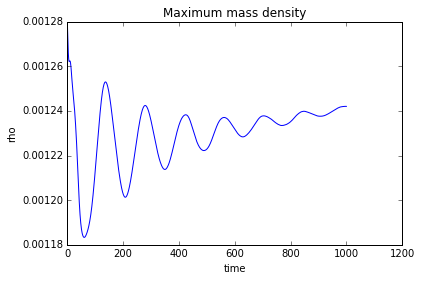

In [38]:
fig, ax = plt.subplots(1,1)
ax.plot(time, rhomax)
ax.set_title('Maximum mass density')
ax.set_xlabel('time')
ax.set_ylabel('rho')
plt.show()

Congratulations! You have setup Cactus, run your first simulation, and visualized some of the results! 

# Going Further

To learn more about Cactus, Simfactory and the Einstein Toolkit, check out these documentation pages:
- http://simfactory.org/info/documentation/userguide/index.html
- http://einsteintoolkit.org/documentation.html

Here are some articles that give an overview of the Cactus framework, Simfactory, and the Einstein Toolkit: 
- https://arxiv.org/abs/1008.4571
- https://arxiv.org/abs/1009.1341
- https://arxiv.org/abs/1111.3344